# Load and Visualize Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('bank-additional-full.csv',sep=';',)

In [3]:
df.info() # no missing values for all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe() # basic descriptive statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df['y'] = df['y'].map({'no':0, 'yes':1}) # binary encoding of class label

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00f7938278>,
      dtype=object)

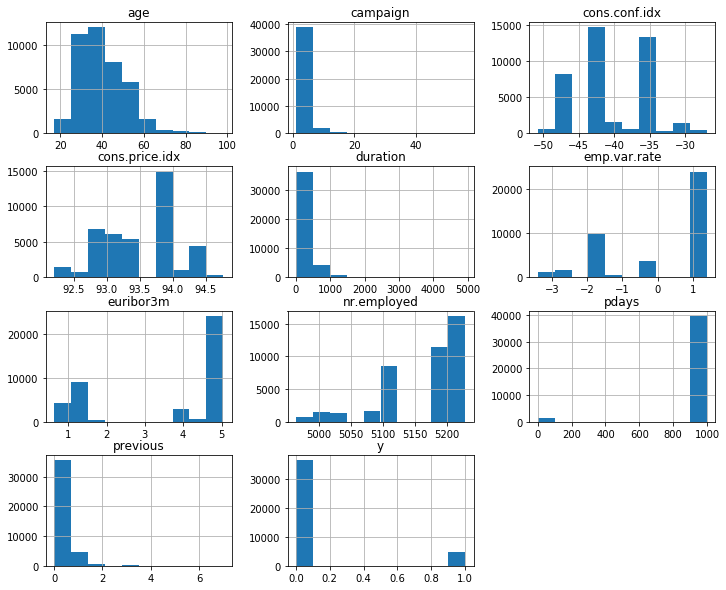

In [7]:
df.hist(figsize=(12,10)) # display numerical feature distribution

In [8]:
df['y'].value_counts() # dataset is imbalanced with majority of class label as "no".

0    36548
1     4640
Name: y, dtype: int64

In [9]:
# dataset is imbalanced with majority of class label as "no".
df['y'].value_counts()/len(df)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [10]:
df.corr() # correlation matrix analysis to show r2 value

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00f79025c0>,
      dtype=object)

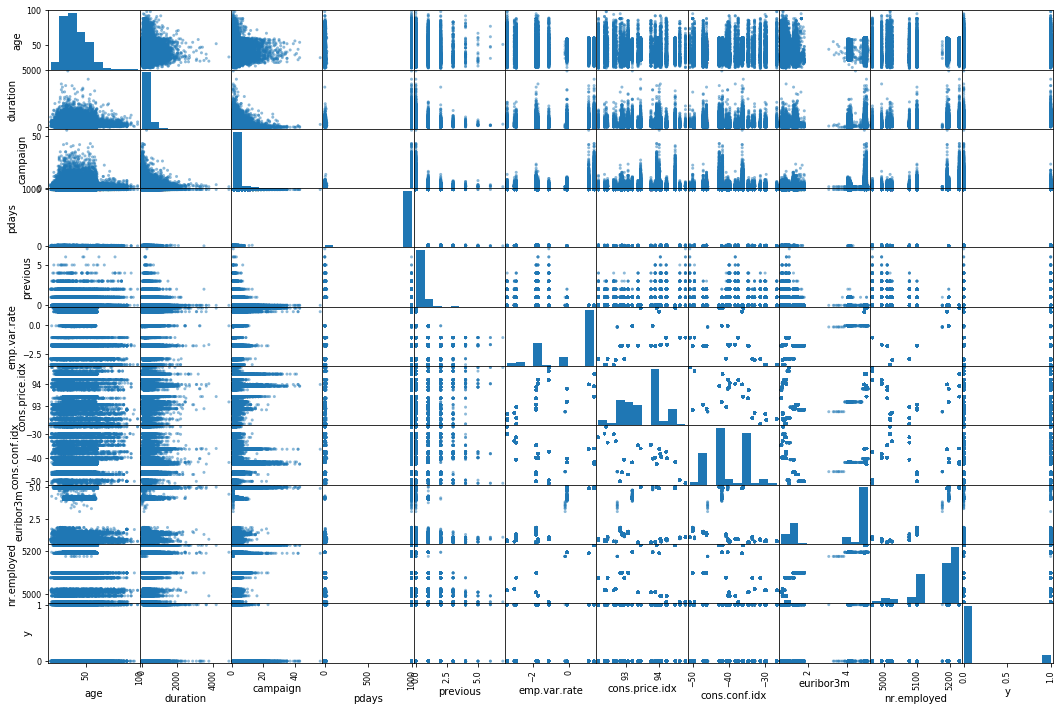

In [11]:
# scatter matrix visualization
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(18,12))

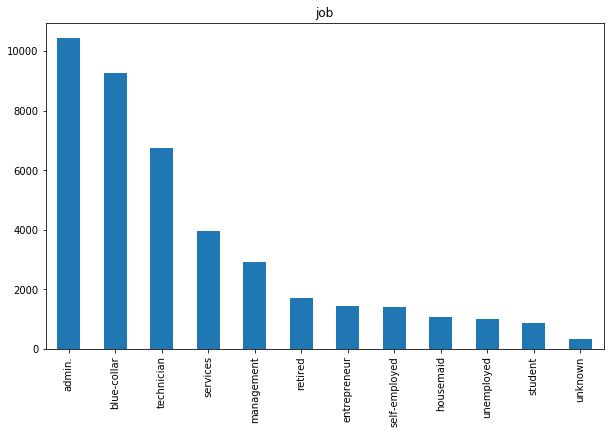

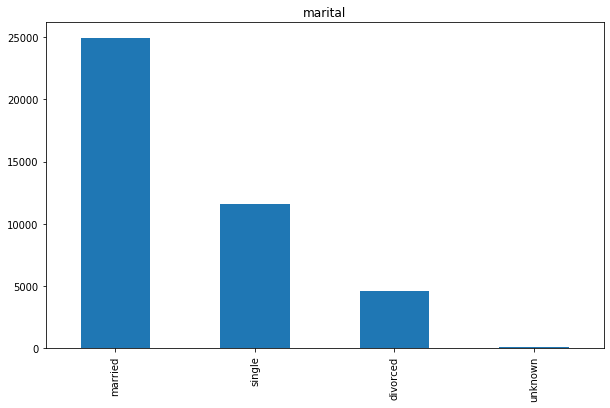

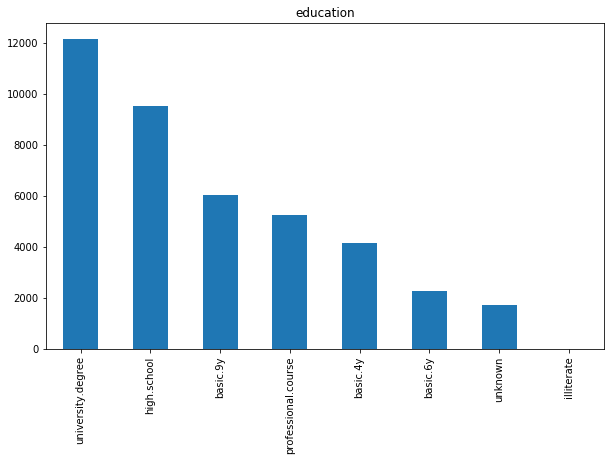

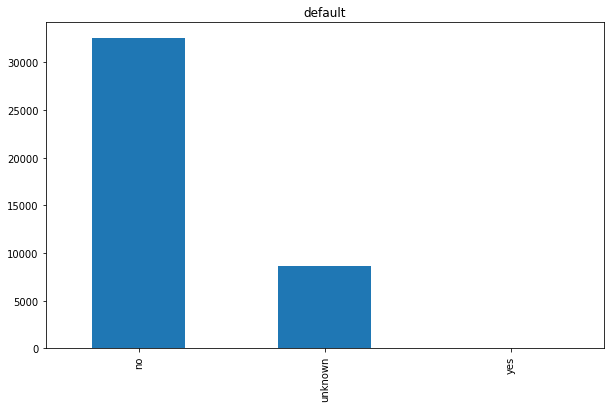

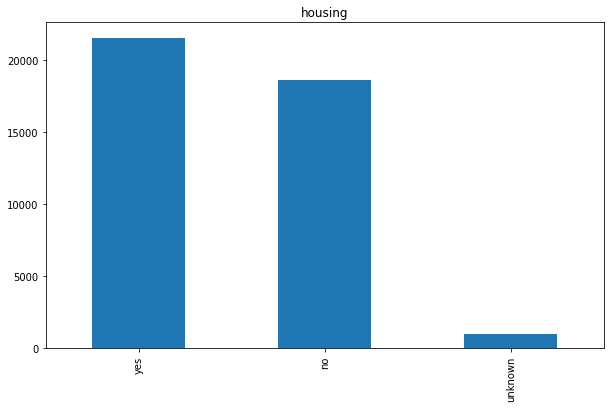

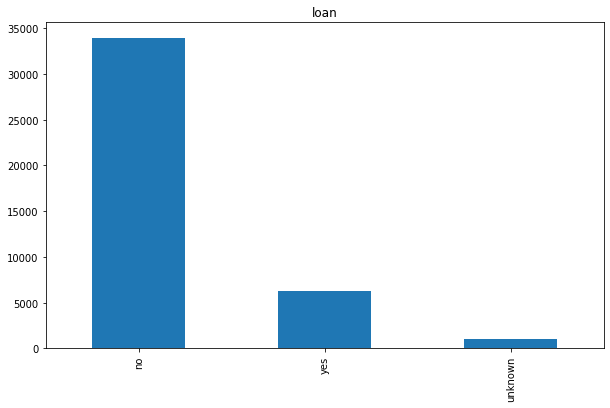

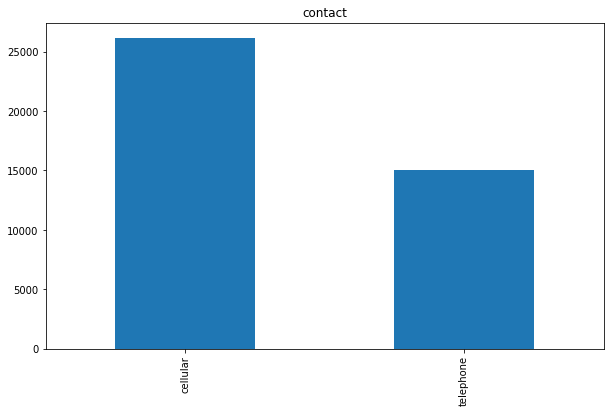

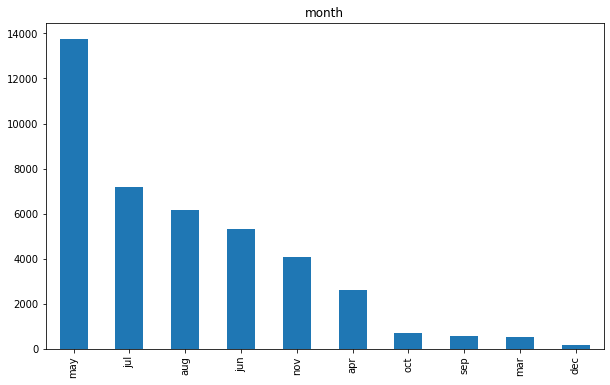

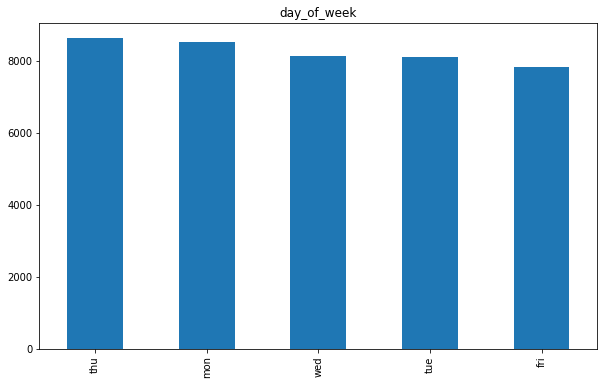

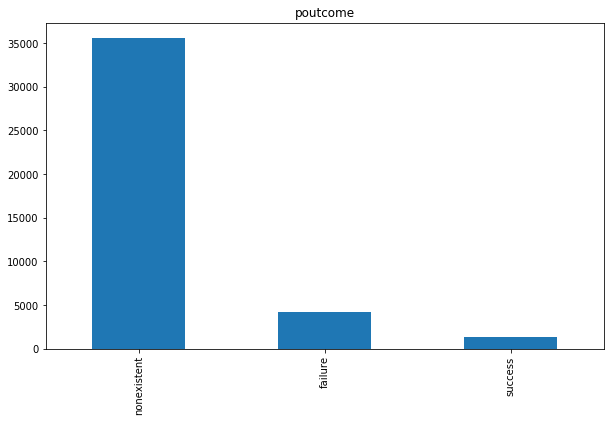

In [12]:
# visualize categorical features
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.show()

# Data Preprocessing

In [13]:
# perform feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
df_new = pd.get_dummies(df)
df_new = df_new.drop('duration', axis=1)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   campaign                       41188 non-null  float64
 2   pdays                          41188 non-null  float64
 3   previous                       41188 non-null  float64
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [16]:
import random
random.seed(3434200)

# split train/validation and test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=18)
for train_index, test_index in split.split(df_new, df_new['y']):
    train_set = df_new.loc[train_index]
    test_set = df_new.loc[test_index]

In [17]:
train_set['y'].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [18]:
# make sure negative class is distributed equally in train and test set.
train_set['y'].value_counts()/len(train_set)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [19]:
test_set['y'].value_counts()/len(test_set)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [20]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['y']==0]
train_positive = train_set[train_set['y']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=29238,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['y'].value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [21]:
# create X, y for upsampled training and testing
X_train = train_upsample.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
y_train = train_upsample['y']
y_test = test_set['y']

In [22]:
# create X, y for imbalanced train set used for performance validation
X_imb = train_set.drop('y', axis=1)
y_imb = train_set['y']

# Define Model and Plotting Functions

In [23]:
# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

In [24]:
# create function to use fitted model to report metrics score on test dataset
# return predicted classification on test dataset
def classifier_test(model_fit, X, y):
    y_pred = model_fit.predict(X)
    print("\n")
    print("\nModel performance on test set\n------------------------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on testing data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on testing data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y, y_pred)))
    return y_pred

In [25]:
# create function to plot ROC curve
from sklearn.metrics import roc_curve

def roc_curve_plot(model, X, y,label=None):
    # make sure positive class prediction is in the second column of binary prediction
    if label=='Neural Network':
        y_score = model.predict_proba(X)[:,0]
    else:
        y_score = model.predict_proba(X)[:,1]
    
    # generate ROC curve data
    roc = roc_curve(y, y_score)
    
    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score = auc(roc[0],roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))

In [26]:
# create a function to predict clients likely to subscribe based on the probability threshold defined by
# the desired population% of the clients to be contacted
# top_percent is the desired population percentage for marketing contact, i.e., 0.2 = top 20%
def y_predict_threshold(model, X, y, top_percent, model_name=None):
    lift_input_model = lift_input(model, X, y, model_name=model_name)
    # get the indice of probility threshold meeting top_percent number
    idx = int(len(lift_input_model[2])*top_percent)
    # get the probility threshold for classification cutoff
    threshold_proba = lift_input_model[2][idx]
    
    # list of predicted probability
    if model_name == 'Neural Network':
        y_proba = model.predict_proba(X)[:,0]
    else:
        y_proba = model.predict_proba(X)[:,1]
        
    # 0,1 classification using threshold cutff
    y_predict = (y_proba>=threshold_proba).astype(int)
    return y_predict

# Define and Train Models

In [27]:
# Import metrics scores, GridSearchCV, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [28]:
# Naive Bayes model without GridserachCV
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred_GNB = model_GNB.predict(X_train)
print("\nGaussian Naive Bayes model on training set\n------------------------")
print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y_train, y_pred_GNB)))
print("Final precision score on training data: {:.4f}".format(precision_score(y_train, y_pred_GNB)))
print("Final Recall score on training data: {:.4f}".format(recall_score(y_train, y_pred_GNB)))
print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y_train, y_pred_GNB)))

# Report the metrics scores on test data
y_pred_test_GNB = model_GNB.predict(X_test)
print("\n")
print("\nGaussian Naive Bayes model on test set\n------------------------")
print("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, y_pred_test_GNB)))
print("Final Precision score on test data: {:.4f}".format(precision_score(y_test, y_pred_test_GNB)))
print("Final Recall score on test data: {:.4f}".format(recall_score(y_test, y_pred_test_GNB)))
print("Final ROC AUC score on test data: {:.4f}".format(roc_auc_score(y_test, y_pred_test_GNB)))
print("\n")


Gaussian Naive Bayes model on training set
------------------------
Final accuracy score on the training data: 0.7176
Final precision score on training data: 0.7388
Final Recall score on training data: 0.6730
Final ROC AUC score on training data: 0.7176



Gaussian Naive Bayes model on test set
------------------------
Final accuracy score on the test data: 0.7586
Final Precision score on test data: 0.2714
Final Recall score on test data: 0.6789
Final ROC AUC score on test data: 0.7238




In [29]:
from sklearn.externals import joblib
# save the model to current directory
joblib.dump(model_GNB, 'saved_models/Gaussian_NB_model.pkl')

['saved_models/Gaussian_NB_model.pkl']

In [30]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create the parameters list
parameters_DT = {'max_depth': [6,7,8],
                 'min_samples_leaf': [2,3],
                 'min_samples_split': [2,3]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_DT, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7483
Final precision score on training data: 0.8234
Final Recall score on training data: 0.6321
Final ROC AUC score on training data: 0.7483


The best parameters are: DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, random_state=18)


In [31]:
# Decision Tree model performance on test dataset
y_test_DT = classifier_test(model_DT, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8383
Final precision score on testing data: 0.3692
Final Recall score on testing data: 0.6142
Final ROC AUC score on testing data: 0.7405


In [32]:
# save the model to current directory
joblib.dump(model_DT, 'saved_models/Decision_Tree_model.pkl')

['saved_models/Decision_Tree_model.pkl']

In [33]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create the parameters list
parameters_LR = {'C': [0.0006,0.0007, 0.0008], 'penalty': ['l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train, 
                          parameters=parameters_LR, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7273
Final precision score on training data: 0.7535
Final Recall score on training data: 0.6755
Final ROC AUC score on training data: 0.7273


The best parameters are: LogisticRegression(C=0.0006, random_state=18)


In [34]:
# Logistic regression model performance on test dataset
y_test_LR = classifier_test(model_LR, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.7686
Final precision score on testing data: 0.2823
Final Recall score on testing data: 0.6832
Final ROC AUC score on testing data: 0.7313


In [35]:
# save the model to current directory
joblib.dump(model_LR, 'saved_models/Logistic_Regression_model.pkl')

['saved_models/Logistic_Regression_model.pkl']

In [36]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [5,6,7], 'min_samples_leaf': [2,3], 'min_samples_split': [2,3]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train, 
                          parameters=parameters_RF, scorer_metrics=recall_score)




Model performance on training set
------------------------
Final accuracy score on the training data: 0.7427
Final precision score on training data: 0.7928
Final Recall score on training data: 0.6570
Final ROC AUC score on training data: 0.7427


The best parameters are: RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=18)


In [37]:
# random forest model performance on test dataset
y_test_RF = classifier_test(model_RF, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.8178
Final precision score on testing data: 0.3391
Final Recall score on testing data: 0.6509
Final ROC AUC score on testing data: 0.7449


In [38]:
# save the model to current directory
joblib.dump(model_RF, 'saved_models/Random_Forest_model.pkl')

['saved_models/Random_Forest_model.pkl']

In [41]:
from sklearn.metrics import auc

# Model Performance Evaluation

In [39]:
# load saved models
model_DT = joblib.load('saved_models/Decision_Tree_model.pkl')
model_GNB = joblib.load('saved_models/Gaussian_NB_model.pkl')
model_LR = joblib.load('saved_models/Logistic_Regression_model.pkl')
model_RF = joblib.load('saved_models/Random_Forest_model.pkl')


AUC score of Decision Tree is 0.8063.
AUC score of Gaussian Naive Bayes is 0.7707.
AUC score of Logistic Regression is 0.7888.
AUC score of Random Forest is 0.8012.


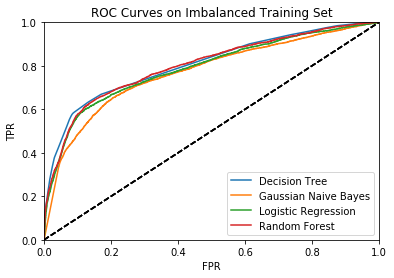

In [42]:
# plot ROC curve for each model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_imb, y_imb, label='Logistic Regression')
roc_curve_plot(model_RF, X_imb, y_imb, label='Random Forest')

plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7669.
AUC score of Gaussian Naive Bayes is 0.7659.
AUC score of Logistic Regression is 0.7827.
AUC score of Random Forest is 0.7865.


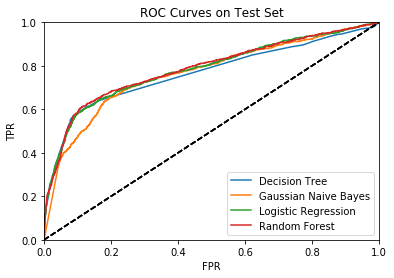

In [43]:
# plot ROC curve for each model on test dataset
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
roc_curve_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_curve_plot(model_RF, X_test, y_test, label='Random Forest')

plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

# Final Model Optimization and Evaluation

In [44]:
# further fine tune decision tree model
parameters_DT_impv = {'criterion':['gini','entropy'], 
                      'splitter':['best','random'],
                      'max_depth': [5,6,7],
                      'min_samples_leaf': [2,3],
                      'min_samples_split': [2,3],
                      'max_features': [None,'auto','sqrt','log2'],
                      'class_weight': [None,'balanced'],
                      'presort': [True,False]
                     }

model_DT_impv = fit_classifier(DecisionTreeClassifier(random_state=66), X_train, y_train, 
                          parameters=parameters_DT_impv, scorer_metrics=recall_score)

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e

/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no e




Model performance on training set
------------------------
Final accuracy score on the training data: 0.6895
Final precision score on training data: 0.6781
Final Recall score on training data: 0.7216
Final ROC AUC score on training data: 0.6895


The best parameters are: DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_leaf=3,
                       presort=True, random_state=66, splitter='random')


/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/home/aradhana/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [45]:
# Improved Decision Tree model performance on test dataset
y_test_DT_impv = classifier_test(model_DT_impv, X_test, y_test)




Model performance on test set
------------------------
Final accuracy score on the testing data: 0.6681
Final precision score on testing data: 0.2122
Final Recall score on testing data: 0.7177
Final ROC AUC score on testing data: 0.6898


In [46]:
# save the model to current directory
joblib.dump(model_DT_impv, 'saved_models/Decision_Tree_model_impv_2.pkl')

['saved_models/Decision_Tree_model_impv_2.pkl']

In [47]:
# load saved models
model_DT_impv2 = joblib.load('saved_models/Decision_Tree_model_impv_2.pkl')
#model_DT_impv = joblib.load('saved_models/Decision_Tree_model_impv_1.pkl')

AUC score of Decision Tree is 0.8063.
AUC score of Decision Tree - Improved (Final) is 0.7491.
AUC score of Gaussian Naive Bayes is 0.7707.


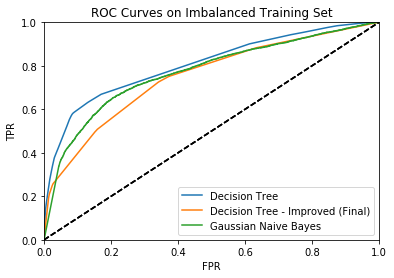

In [48]:
# plot ROC curve for improved model on imbalanced training set
roc_curve_plot(model_DT, X_imb, y_imb, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_imb, y_imb, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_imb, y_imb, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Imbalanced Training Set')
plt.legend(loc='lower right')

AUC score of Decision Tree is 0.7669.
AUC score of Decision Tree - Improved (Final) is 0.7445.
AUC score of Gaussian Naive Bayes is 0.7659.


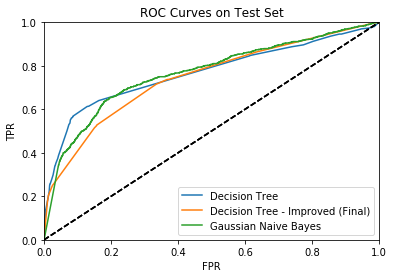

In [49]:
# plot ROC curve for improved model on test set
roc_curve_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_curve_plot(model_DT_impv, X_test, y_test, label='Decision Tree - Improved (Final)')
roc_curve_plot(model_GNB, X_test, y_test, label='Gaussian Naive Bayes')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')

In [50]:
# save final model to local disk
joblib.dump(model_DT_impv, 'saved_models/Final_model.pkl')

['saved_models/Final_model.pkl']

# Free-Form Visualization

Top 10 features contribute to 99.8% of the final mode.


Text(0, 0.5, 'Importance Contribution %')

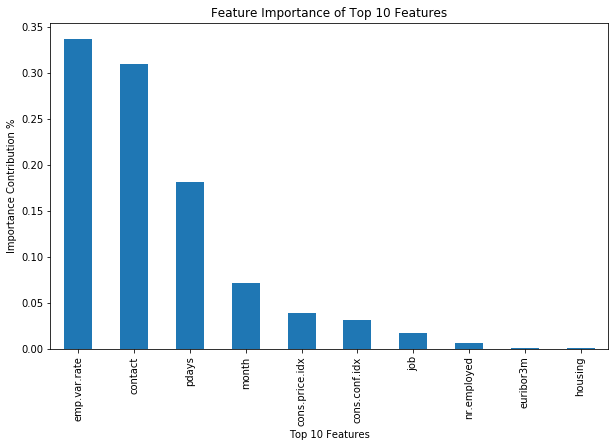

In [53]:
# visualize the feature importance of final model

# create series of feature importance of final model
series_feature = pd.Series(index=X_train.columns, data=model_DT_impv.feature_importances_.reshape(62,))

# combine the feature importance value of onehotencoded categorical features back to original feature list

feature_dict={} # create empty dictionary with keys defined
for i in df.columns[:-1]:
    feature_dict[i]=0

# combine feature importance
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue

series_feature = pd.Series(feature_dict) # convert dictionary to Series
feature_sort = series_feature.sort_values(ascending=False) # Descending sort of feature importance
# calculate gross contribution
print('Top 10 features contribute to %.1f%% of the final mode.' % sum(feature_sort[0:10]*100))
feature_sort[0:10].plot.bar(figsize = (10, 6))
plt.title('Feature Importance of Top 10 Features')
plt.xlabel('Top 10 Features')
plt.ylabel('Importance Contribution %')